<a href="https://colab.research.google.com/github/svikram/blockviewed/blob/master/telcome_churn_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
#

** Read the csv file**

In [90]:
Tel_data=pd.read_csv('/content/sample_data/Telecom_Churn.csv')  # read the csv file
Tel_data.head()



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,False,NaN,NaN,NaN
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,True,NaN,NaN,NaN
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,True,NaN,NaN,NaN
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,False,NaN,NaN,NaN
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,False,NaN,NaN,NaN


In [92]:
Tel_data.shape

(667, 23)

In [91]:
print("The number of rows are {}".format(Tel_data.shape[0]))
print("The number of columns are {}".format(Tel_data.shape[1]))

The number of rows are 667
The number of columns are 23


In [ ]:
Tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

**Drop The column **

In [110]:
Tel_data.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis=1,inplace=True)

In [111]:
Tel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [120]:
Tel_data.describe().T  ##Transport the data row to column and vice versa

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


In [121]:
round(Tel_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.84,40.82,1.00,76.00,102.00,128.00,232.00
Area code,667.0,436.16,41.78,408.00,408.00,415.00,415.00,510.00
Number vmail messages,667.0,8.41,13.99,0.00,0.00,0.00,20.00,51.00
Total day minutes,667.0,180.95,55.51,25.90,146.25,178.30,220.70,334.30
Total day calls,667.0,100.94,20.40,30.00,87.50,101.00,115.00,165.00
Total day charge,667.0,30.76,9.44,4.40,24.86,30.31,37.52,56.83
Total eve minutes,667.0,203.36,49.72,48.10,171.05,203.70,236.45,361.80
Total eve calls,667.0,100.48,18.95,37.00,88.00,101.00,113.00,168.00
Total eve charge,667.0,17.29,4.23,4.09,14.54,17.31,20.10,30.75
Total night minutes,667.0,199.69,49.76,23.20,167.95,201.60,231.50,367.70


In [122]:
round(Tel_data.describe(include='all').T,2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,667,51,AZ,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,667.0,NaN,NaN,NaN,102.841079,40.81948,1.0,76.0,102.0,128.0,232.0
Area code,667.0,NaN,NaN,NaN,436.157421,41.783305,408.0,408.0,415.0,415.0,510.0
International plan,667,2,No,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,667,2,No,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,667.0,NaN,NaN,NaN,8.407796,13.99448,0.0,0.0,0.0,20.0,51.0
Total day minutes,667.0,NaN,NaN,NaN,180.948126,55.508628,25.9,146.25,178.3,220.7,334.3
Total day calls,667.0,NaN,NaN,NaN,100.937031,20.39679,30.0,87.5,101.0,115.0,165.0
Total day charge,667.0,NaN,NaN,NaN,30.761769,9.436463,4.4,24.86,30.31,37.52,56.83
Total eve minutes,667.0,NaN,NaN,NaN,203.355322,49.719268,48.1,171.05,203.7,236.45,361.8


In [124]:
Tel_data.describe(include='object').T

,count,unique,top,freq
State,667,51,AZ,19
International plan,667,2,No,614
Voice mail plan,667,2,No,478


In [ ]:
Tel_data_summary=round(Tel_data.describe(include='object').T,2)

In [125]:
Tel_data_summary

,count,unique,top,freq
State,667,51,AZ,19
International plan,667,2,No,614
Voice mail plan,667,2,No,478


In [126]:
Tel_data.describe(include='object').T

,count,unique,top,freq
State,667,51,AZ,19
International plan,667,2,No,614
Voice mail plan,667,2,No,478


In [127]:
round(Tel_data.describe(percentiles=[.05,.25,.50,.75,.90,.95]).T,2)

,count,mean,std,min,5%,25%,50%,75%,90%,95%,max
Account length,667.0,102.84,40.82,1.00,34.30,76.00,102.00,128.00,155.40,170.70,232.00
Area code,667.0,436.16,41.78,408.00,408.00,408.00,415.00,415.00,510.00,510.00,510.00
Number vmail messages,667.0,8.41,13.99,0.00,0.00,0.00,0.00,20.00,32.40,36.00,51.00
Total day minutes,667.0,180.95,55.51,25.90,87.32,146.25,178.30,220.70,251.20,272.96,334.30
Total day calls,667.0,100.94,20.40,30.00,68.00,87.50,101.00,115.00,126.40,134.00,165.00
Total day charge,667.0,30.76,9.44,4.40,14.84,24.86,30.31,37.52,42.71,46.40,56.83
Total eve minutes,667.0,203.36,49.72,48.10,119.30,171.05,203.70,236.45,266.54,281.01,361.80
Total eve calls,667.0,100.48,18.95,37.00,69.00,88.00,101.00,113.00,125.00,131.00,168.00
Total eve charge,667.0,17.29,4.23,4.09,10.14,14.54,17.31,20.10,22.65,23.88,30.75
Total night minutes,667.0,199.69,49.76,23.20,119.43,167.95,201.60,231.50,261.64,282.29,367.70


In [128]:
Tel_data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [129]:
for i in Tel_data.columns:
  print(i)
  print(Tel_data[i].unique())
  print()

State
['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']

Account length
[117  65 161 111  49  36 119  10  68  74  85  46 128 155  73  77 108  95
 141  63  97  75 127 121   6  32  64  25  93 208 122  99  45 139 215  94
  86 106  92  78  83 144 143  81 145  89 199  96 124 148 135  87  54  35
  84 112 129 140  70  79  91 149  60 115 102  55 126  52  67 165 150  26
  69 157  80  44 101  82  39  30 105 166 172  88 153 109  27   3  43 116
 107 123 110 176  13 156 158 103 151  90  33 167  38 100 136 120 104   1
  76 132 114  48  59  50  12 131 217 134  53  72  98 118 130 159  37  29
 113 163  56  51  66 193   7  71  31 190 170 125 232 182 197  57 137  21
 191  16  34 146 138  62 201 133 162 195 177  41  61 152 175 160  19 142
 189 169  15 180 183  58 196 147 164 209 171 186 178  28 185 

In [130]:
cat=[]
num=[]



In [131]:
for i in Tel_data.columns:
  if Tel_data[i].dtypes=='object':
    cat.append(i)
  else:
    num.append(i)



In [100]:
cat

['State', 'International plan', 'Voice mail plan']

In [132]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [133]:
for i in cat:
  print(i)
  print(Tel_data[i].unique())
  print()

State
['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']

International plan
['No' 'Yes']

Voice mail plan
['No' 'Yes']



In [ ]:
for i in num:
  print(i)
  print(Tel_data[i].unique())
  print()

Account length
[117  65 161 111  49  36 119  10  68  74  85  46 128 155  73  77 108  95
 141  63  97  75 127 121   6  32  64  25  93 208 122  99  45 139 215  94
  86 106  92  78  83 144 143  81 145  89 199  96 124 148 135  87  54  35
  84 112 129 140  70  79  91 149  60 115 102  55 126  52  67 165 150  26
  69 157  80  44 101  82  39  30 105 166 172  88 153 109  27   3  43 116
 107 123 110 176  13 156 158 103 151  90  33 167  38 100 136 120 104   1
  76 132 114  48  59  50  12 131 217 134  53  72  98 118 130 159  37  29
 113 163  56  51  66 193   7  71  31 190 170 125 232 182 197  57 137  21
 191  16  34 146 138  62 201 133 162 195 177  41  61 152 175 160  19 142
 189 169  15 180 183  58 196 147 164 209 171 186 178  28 185 204 184]

Area code
[408 415 510]

Number vmail messages
[ 0 30 33 29 32 27 22 23 41 48 24 34 37 35 21 26 16 20 18 31 14 28 39 36
 45 51 38 11 19 15 25 40 49 17 42 13 46]

Total day minutes
[184.5 129.1 332.9 110.4 119.3 146.3 211.3 159.1 186.1 148.8 193.7 235.8
 214

In [ ]:
for i in cat:
  print(i)
  print(Tel_data[i].nunique())
  print()

State
51

International plan
2

Voice mail plan
2



In [ ]:
for i in cat:

  print(Tel_data[i].value_counts())
  print()

State
AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: count, dtype: int64

International plan
No     614
Yes     53
Name: count, dtype: int64

Voice mail plan
No     478
Yes    189
Name: count, dtype: int64



In [ ]:
for i in num:

  print(Tel_data[i].value_counts())
  print()

Account length
95     13
127    11
90     10
105    10
64      9
       ..
170     1
232     1
197     1
137     1
184     1
Name: count, Length: 179, dtype: int64

Area code
415    337
408    169
510    161
Name: count, dtype: int64

Number vmail messages
0     478
29     14
36     11
27     10
31     10
33      9
28      9
30      9
26      9
20      8
35      8
39      8
22      8
32      8
21      6
41      6
23      6
34      6
24      5
19      5
37      4
25      4
38      3
40      3
45      2
14      2
11      2
17      2
42      2
48      2
16      2
13      1
18      1
49      1
15      1
51      1
46      1
Name: count, dtype: int64

Total day minutes
153.5    4
189.8    4
154.8    3
183.6    3
157.3    3
        ..
245.2    1
215.6    1
322.3    1
25.9     1
213.8    1
Name: count, Length: 562, dtype: int64

Total day calls
102    21
97     18
101    17
91     15
95     14
       ..
30      1
165     1
147     1
61      1
139     1
Name: count, Length: 100, dtype: int64

T

In [ ]:
Tel_data['Churn'].value_counts()

,count
Churn,
False,572
True,95


In [ ]:
for i in cat:

  print(Tel_data[i].value_counts(normalize=True))
  print()

State
AZ    0.028486
ND    0.026987
WV    0.026987
NJ    0.026987
KS    0.026987
NM    0.026987
WA    0.026987
RI    0.025487
ID    0.025487
MS    0.025487
WI    0.025487
TX    0.025487
IN    0.025487
LA    0.023988
NE    0.023988
OR    0.023988
KY    0.023988
VT    0.023988
NY    0.022489
MI    0.022489
MT    0.022489
CT    0.022489
AL    0.020990
MN    0.020990
MA    0.019490
IL    0.019490
ME    0.019490
NH    0.019490
TN    0.017991
UT    0.017991
NC    0.017991
MO    0.017991
OH    0.017991
SD    0.016492
WY    0.016492
SC    0.016492
CA    0.014993
DE    0.014993
VA    0.014993
MD    0.014993
FL    0.013493
AK    0.013493
DC    0.013493
HI    0.013493
PA    0.013493
OK    0.013493
AR    0.011994
CO    0.010495
IA    0.008996
NV    0.007496
GA    0.007496
Name: proportion, dtype: float64

International plan
No     0.92054
Yes    0.07946
Name: proportion, dtype: float64

Voice mail plan
No     0.716642
Yes    0.283358
Name: proportion, dtype: float64



In [ ]:
Tel_data['Churn'].value_counts(normalize=True)

,proportion
Churn,
False,0.857571
True,0.142429


In [ ]:
Tel_data.sort_values(by='Account length')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
480,AK,1,408,No,No,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,False
189,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
138,CT,3,415,No,Yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
28,MO,6,510,No,No,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False
284,NV,7,408,No,Yes,30,221.4,114,37.64,165.8,116,14.09,247.0,105,11.12,10.8,12,2.92,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,NY,209,415,No,No,0,153.7,105,26.13,188.6,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False
525,SC,209,510,No,No,0,255.1,124,43.37,230.6,110,19.60,218.0,69,9.81,8.5,5,2.30,3,True
42,WY,215,510,No,No,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False
218,TX,217,408,No,No,0,176.4,115,29.99,158.8,128,13.50,306.6,107,13.80,9.3,3,2.51,4,False


In [ ]:
Tel_data.sort_values(by='Account length',ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
300,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,False
218,TX,217,408,No,No,0,176.4,115,29.99,158.8,128,13.50,306.6,107,13.80,9.3,3,2.51,4,False
42,WY,215,510,No,No,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False
525,SC,209,510,No,No,0,255.1,124,43.37,230.6,110,19.60,218.0,69,9.81,8.5,5,2.30,3,True
640,NY,209,415,No,No,0,153.7,105,26.13,188.6,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NV,7,408,No,Yes,30,221.4,114,37.64,165.8,116,14.09,247.0,105,11.12,10.8,12,2.92,1,False
28,MO,6,510,No,No,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False
138,CT,3,415,No,Yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
480,AK,1,408,No,No,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,False


In [ ]:
Tel_data.sort_values(by='Customer service calls',ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
313,SC,64,510,No,Yes,40,210.0,116,35.70,232.7,89,19.78,168.8,94,7.60,5.9,4,1.59,8,False
579,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
149,WI,165,510,No,No,0,154.2,91,26.21,268.6,108,22.83,188.8,99,8.50,10.9,4,2.94,6,False
299,MS,73,415,No,Yes,31,82.3,105,13.99,256.1,91,21.77,229.6,98,10.33,11.8,2,3.19,6,True
398,WA,100,408,No,No,0,70.8,94,12.04,215.6,102,18.33,230.8,125,10.39,9.5,1,2.57,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,AZ,100,510,No,No,0,78.7,98,13.38,225.6,102,19.18,150.4,106,6.77,14.0,8,3.78,0,False
162,TN,33,415,No,Yes,35,186.8,124,31.76,261.0,69,22.19,317.8,103,14.30,15.0,5,4.05,0,False
556,WV,87,415,No,No,0,58.0,125,9.86,67.5,116,5.74,185.9,136,8.37,11.5,3,3.11,0,False
158,ME,151,415,No,Yes,26,196.5,98,33.41,175.8,111,14.94,221.8,124,9.98,13.4,5,3.62,0,False


In [ ]:
Tel_data.sort_values(by=['Customer service calls','Account length'],ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
313,SC,64,510,No,Yes,40,210.0,116,35.70,232.7,89,19.78,168.8,94,7.60,5.9,4,1.59,8,False
579,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
149,WI,165,510,No,No,0,154.2,91,26.21,268.6,108,22.83,188.8,99,8.50,10.9,4,2.94,6,False
155,UT,103,510,No,Yes,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6,True
398,WA,100,408,No,No,0,70.8,94,12.04,215.6,102,18.33,230.8,125,10.39,9.5,1,2.57,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TN,33,415,No,Yes,35,186.8,124,31.76,261.0,69,22.19,317.8,103,14.30,15.0,5,4.05,0,False
29,AL,32,510,No,No,0,230.9,87,39.25,187.4,90,15.93,154.0,53,6.93,6.3,2,1.70,0,False
597,OH,32,415,No,Yes,31,232.8,97,39.58,183.5,111,15.60,206.8,111,9.31,13.0,2,3.51,0,False
136,MT,27,510,No,No,0,193.8,102,32.95,118.9,104,10.11,135.9,124,6.12,9.2,3,2.48,0,False


In [ ]:
Tel_data.groupby(by=['Churn']).sum()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
False,LASCHIAKMIVAWIMNHIMNVTMTMAKYMICOAZIDCAWALANEOH...,58708,249218,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,NoNoNoYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoN...,5143,100363.2,57644,17062.09,114285.4,57227,9714.29,113722.4,57348,5117.53,5858.8,2581,1582.20,822
True,INNYIDLAIDTXMNKSSDOKCTFLRIINMSORALMEMOWIVTWVOK...,9887,41699,NoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesY...,NoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesN...,465,20329.2,9681,3456.01,21352.6,9791,1814.98,19467.7,9428,876.07,970.2,439,262.02,221


In [ ]:
Tel_data[num].groupby(by=['Churn']).sum()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,58708,249218,5143,100363.2,57644,17062.09,114285.4,57227,9714.29,113722.4,57348,5117.53,5858.8,2581,1582.20,822
True,9887,41699,465,20329.2,9681,3456.01,21352.6,9791,1814.98,19467.7,9428,876.07,970.2,439,262.02,221


In [ ]:
round(Tel_data[num].groupby(['Churn']).mean(),2)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,102.64,435.70,8.99,175.46,100.78,29.83,199.80,100.05,16.98,198.82,100.26,8.95,10.24,4.51,2.77,1.44
True,104.07,438.94,4.89,213.99,101.91,36.38,224.76,103.06,19.11,204.92,99.24,9.22,10.21,4.62,2.76,2.33


In [ ]:
Tel_data.pivot_table(['Account length','Total day calls'],index=['Churn','International plan'],aggfunc='mean')

Account length  Total day calls
Churn International plan                                 
False No                      102.178439       100.381041
      Yes                     109.882353       107.029412
True  No                      104.671053       102.894737
      Yes                     101.684211        97.947368

In [ ]:
Tel_data['International plan'].replace(to_replace=['No','Yes'],value=['NAT','INT'],inplace=True)
Tel_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,NAT,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,NAT,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,NAT,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,NAT,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,NAT,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,NAT,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,NAT,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,NAT,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,NAT,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
round(Tel_data.pivot_table(['Account length','Total day calls','Total eve calls'],index=['Churn','International plan'],aggfunc='mean'),2)

Account length  Total day calls  Total eve calls
Churn International plan                                                  
False INT                         109.88           107.03            99.53
      NAT                         102.18           100.38           100.08
True  INT                         101.68            97.95           100.00
      NAT                         104.67           102.89           103.83

In [ ]:
round(Tel_data.pivot_table(['Account length','Total day calls','Total eve calls'],
                           index=['State','Churn'],
                           columns=['International plan'],
                           aggfunc='mean'),2)

Account length         Total day calls          \
International plan            INT     NAT             INT     NAT   
State Churn                                                         
AK    False                   NaN   80.00             NaN   98.33   
AL    False                   NaN  101.00             NaN   98.00   
      True                   55.0     NaN            91.0     NaN   
AR    False                   NaN  107.62             NaN   89.00   
AZ    False                  92.0   96.00            88.0   95.35   
...                           ...     ...             ...     ...   
WI    True                  109.0  153.00            93.5  103.00   
WV    False                   NaN   99.47             NaN   97.40   
      True                  133.5   44.00           111.5  121.00   
WY    False                 127.0  102.89            99.0  110.11   
      True                    NaN  134.00             NaN   93.00   

                   Total eve calls          
International plan             INT     NAT  
State Churn                                 
AK    False                    NaN  101.44  
AL    False                    NaN   99.54  
      True                   110.0     NaN  
AR    False                    NaN   86.38  
AZ    False                  103.0   99.59  
...                            ...     ...  
WI    True                    96.5   90.00  
WV    False                    NaN   91.40  
      True                   100.0   79.00  
WY    False                  118.0   95.67  
      True                     NaN  117.00  

[93 rows x 6 columns]

In [ ]:
round(Tel_data.pivot_table(['Account length','Total day calls','Total eve calls'],
                           index=['State','Churn'],
                           aggfunc=['mean','count']),2)

mean                                          count  \
            Account length Total day calls Total eve calls Account length   
State Churn                                                                 
AK    False          80.00           98.33          101.44              9   
AL    False         101.00           98.00           99.54             13   
      True           55.00           91.00          110.00              1   
AR    False         107.62           89.00           86.38              8   
AZ    False          95.78           94.94           99.78             18   
...                    ...             ...             ...            ...   
WI    True          123.67           96.67           94.33              3   
WV    False          99.47           97.40           91.40             15   
      True          103.67          114.67           93.00              3   
WY    False         105.30          109.00           97.90             10   
      True          134.00           93.00          117.00              1   

                                             
            Total day calls Total eve calls  
State Churn                                  
AK    False               9               9  
AL    False              13              13  
      True                1               1  
AR    False               8               8  
AZ    False              18              18  
...                     ...             ...  
WI    True                3               3  
WV    False              15              15  
      True                3               3  
WY    False              10              10  
      True                1               1  

[93 rows x 6 columns]

In [ ]:
state_wise_data=round(Tel_data.pivot_table(['Account length','Total day calls','Total eve calls'],
                           index=['State','Churn'],
                           aggfunc=['mean','count']),2)

In [ ]:
state_wise_data

mean                                          count  \
            Account length Total day calls Total eve calls Account length   
State Churn                                                                 
AK    False          80.00           98.33          101.44              9   
AL    False         101.00           98.00           99.54             13   
      True           55.00           91.00          110.00              1   
AR    False         107.62           89.00           86.38              8   
AZ    False          95.78           94.94           99.78             18   
...                    ...             ...             ...            ...   
WI    True          123.67           96.67           94.33              3   
WV    False          99.47           97.40           91.40             15   
      True          103.67          114.67           93.00              3   
WY    False         105.30          109.00           97.90             10   
      True          134.00           93.00          117.00              1   

                                             
            Total day calls Total eve calls  
State Churn                                  
AK    False               9               9  
AL    False              13              13  
      True                1               1  
AR    False               8               8  
AZ    False              18              18  
...                     ...             ...  
WI    True                3               3  
WV    False              15              15  
      True                3               3  
WY    False              10              10  
      True                1               1  

[93 rows x 6 columns]

<Axes: ylabel='count'>

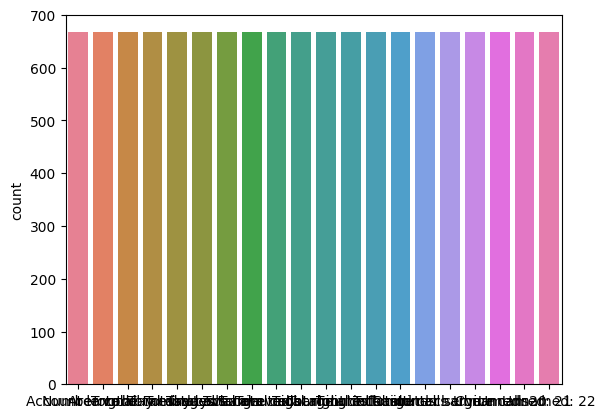

In [103]:
sns.countplot(Tel_data)

<Axes: xlabel='International plan', ylabel='count'>

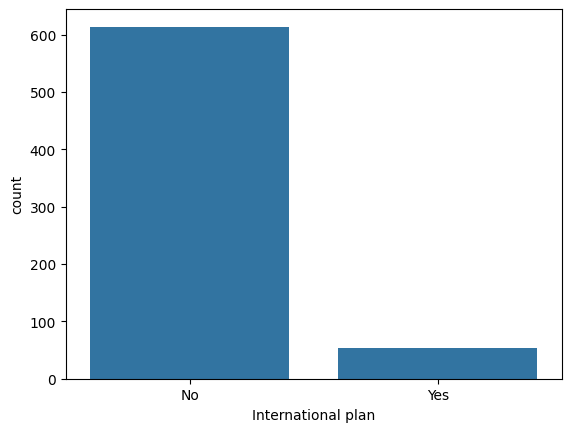

In [104]:
sns.countplot(x='International plan',data=Tel_data)

AttributeError: 'function' object has no attribute 'countplot'

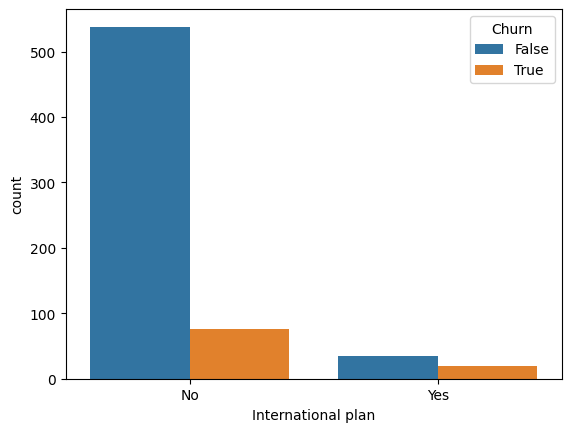

In [106]:
sns.countplot(data=Tel_data,x='International plan',hue='Churn').set.countplot(title ='Plan Distribution', xlabel='International plan',ylabel='count')

In [134]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [135]:
num_data_wc=['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls' ]

In [139]:
data = Tel_data[num_data_wc].corr()
round(data,3)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Account length,1.000,-0.012,0.018,0.036,0.018,0.027,0.021,0.027,-0.008,0.027,-0.008,0.002,0.031,0.002,-0.028
Number vmail messages,-0.012,1.000,-0.069,-0.010,-0.069,0.041,-0.052,0.041,0.040,0.003,0.040,0.030,-0.037,0.030,0.008
Total day minutes,0.018,-0.069,1.000,-0.032,1.000,0.018,0.043,0.018,-0.032,0.053,-0.032,-0.007,0.017,-0.007,0.029
Total day calls,0.036,-0.010,-0.032,1.000,-0.032,-0.005,0.006,-0.005,0.080,-0.030,0.080,-0.015,-0.005,-0.015,-0.046
Total day charge,0.018,-0.069,1.000,-0.032,1.000,0.018,0.043,0.018,-0.032,0.053,-0.032,-0.007,0.017,-0.007,0.029
Total eve minutes,0.027,0.041,0.018,-0.005,0.018,1.000,-0.029,1.000,-0.008,0.002,-0.008,-0.028,0.003,-0.028,-0.012
Total eve calls,0.021,-0.052,0.043,0.006,0.043,-0.029,1.000,-0.029,-0.010,0.036,-0.010,-0.001,0.075,-0.001,0.008
Total eve charge,0.027,0.041,0.018,-0.005,0.018,1.000,-0.029,1.000,-0.008,0.002,-0.008,-0.028,0.003,-0.028,-0.012
Total night minutes,-0.008,0.040,-0.032,0.080,-0.032,-0.008,-0.010,-0.008,1.000,0.005,1.000,-0.042,-0.057,-0.042,-0.068
Total night calls,0.027,0.003,0.053,-0.030,0.053,0.002,0.036,0.002,0.005,1.000,0.005,0.024,-0.072,0.024,-0.040


<Axes: >

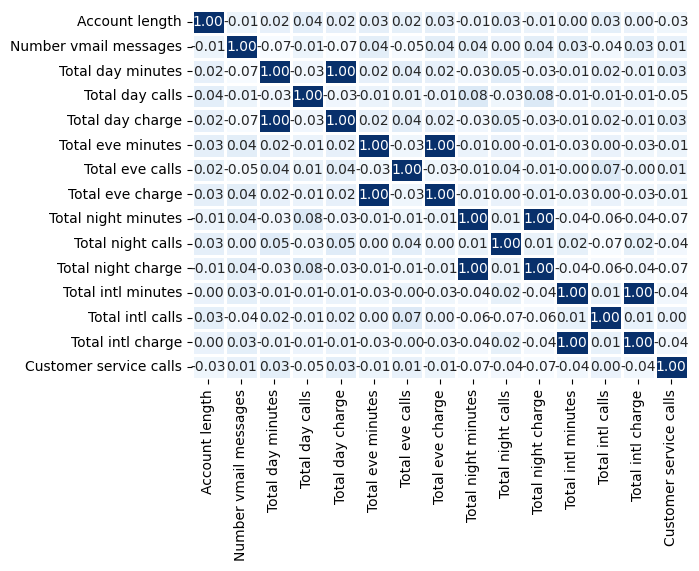

In [144]:
sns.heatmap(round(data,3),annot=True,cmap='Blues',fmt='.2f',cbar=False,linewidths=2)